In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

%matplotlib inline
warnings.filterwarnings('ignore')

In [59]:
# Ler o dataset original
data = pd.read_csv('original.csv')

### Distribuição do Dataset

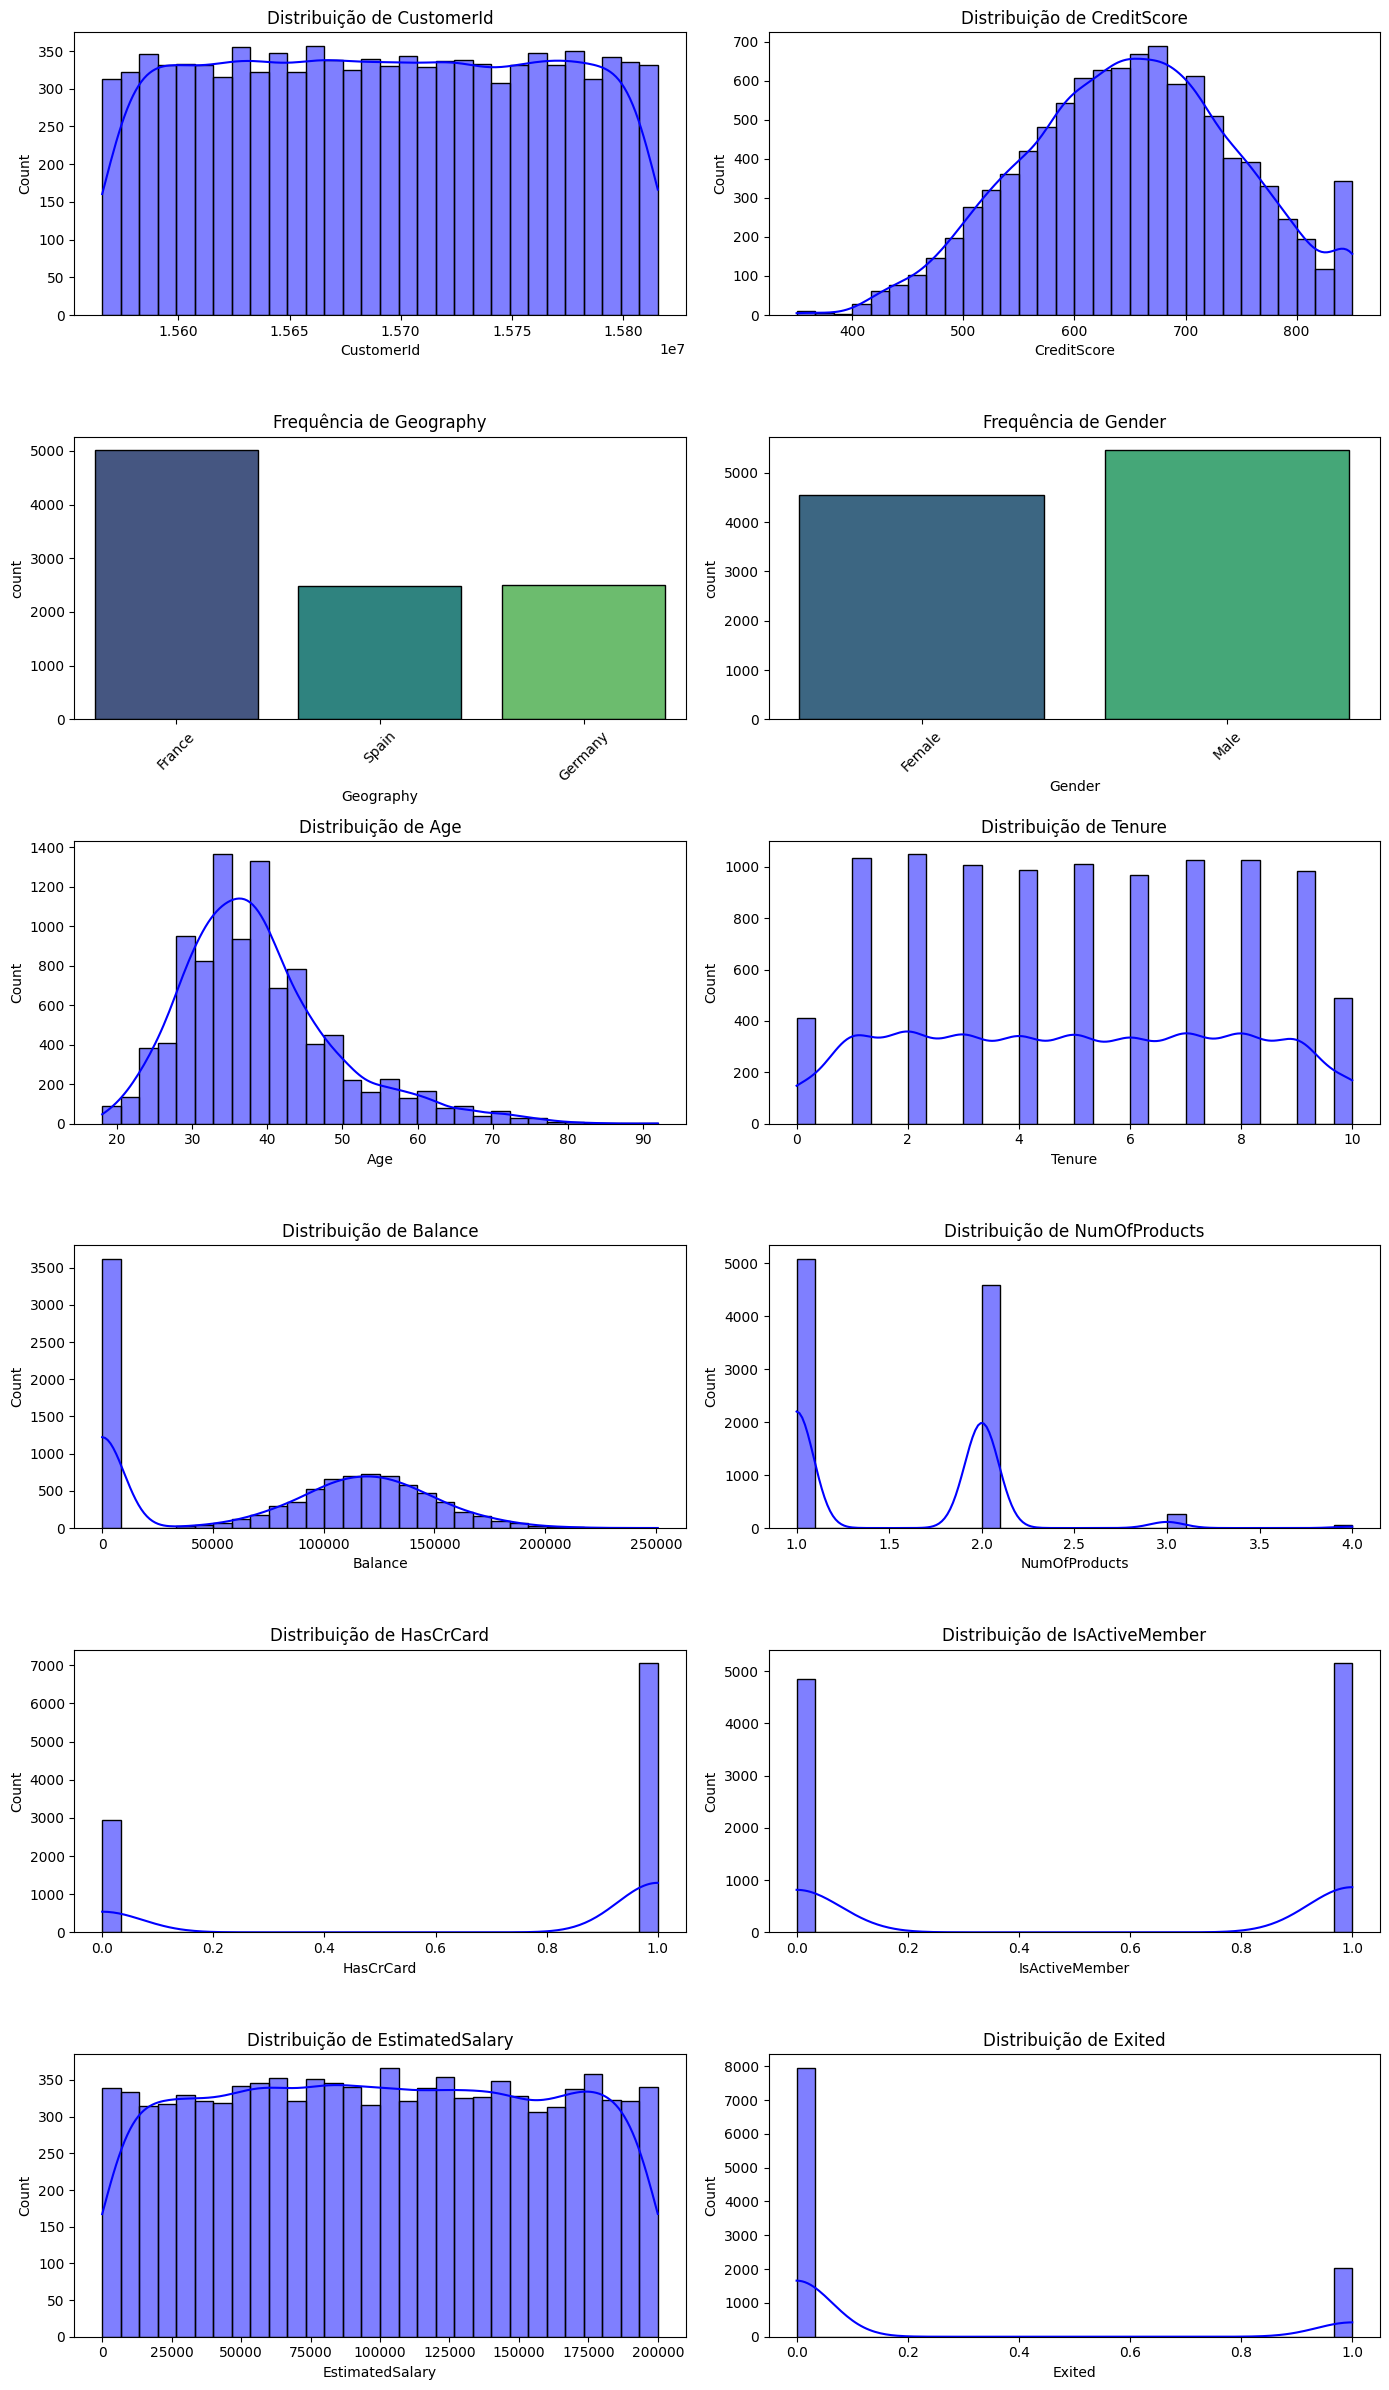

In [60]:
# Remover colunas que não queremos analisar
df = data.drop(columns=['RowNumber', 'Surname'])
columns = df.columns
num_plots = len(columns)

# Criar subplots com 2 colunas por linha
ncols = 2
nrows = (num_plots + 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 4))
axes = axes.flatten()

# Gerar gráficos para cada coluna
for i, col in enumerate(columns):
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='blue', edgecolor='black')
        axes[i].set_title(f'Distribuição de {col}')
    else:
        sns.countplot(x=df[col], ax=axes[i], palette='viridis', edgecolor='black')
        axes[i].set_title(f'Frequência de {col}')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

### Qualidade e Conformidade dos Dados

Nas células de código desta secção, pretende-se procurar e identificar erros nos dados, sejam valores em falta, sejam erros de codificação ou medição, sejam inconsistências, entre outros.

In [61]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [62]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Conforme é possível verificar através do código executado, o *dataset* não contem valores nulos nem N/A, pelo que não existem valores em falta.

In [63]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [64]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [65]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [66]:
data['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [67]:
data['IsActiveMember'].unique()

array([1, 0], dtype=int64)

In [68]:
data['Exited'].unique()

array([1, 0], dtype=int64)

In [69]:
print(sorted(data['NumOfProducts'].unique()))

[1, 2, 3, 4]


In [70]:
print(sorted(data['Tenure'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [71]:
# Verificar o número de linhas duplicadas
num_duplicados = data.duplicated().sum()

print(f"Número de registos duplicadas no dataset: {num_duplicados}")

Número de registos duplicadas no dataset: 0


Através da descrição dos dados anteriormente efetuada e da análise de valores únicos em cada coluna, também é possível constatar que:
* O intervalo de valores para as pontuações de crédito, [350, 850];
* Os valores dos atributos *Tenure* e *NumOfProducts*, ao variarem, respetivamente, de 0 a 10 e de 1 a 4, são todos plausíveis;
* As colunas categóricas não contêm erros de codificação, dado que *Geography* só toma os valores "France", "Spain" e "Germany", enquanto *Gender* só é "Male" ou "Female";
* Os atributos binários assumem unicamente os valores 0 e 1, tal como esperado;
* Não existem registos duplicados, ou seja, cada cliente só aparece uma vez no *dataset*.

Tudo isto indica que não existem erros de medição nem inconsistências de valores/codificação nos dados constantes do *dataset* original.

### Objetivo da Divulgação do Dataset

In [72]:
print("Idade mínima:", min(data['Age']))
print("Idade máxima:", max(data['Age']))

Idade mínima: 18
Idade máxima: 92


In [73]:
# Definir intervalos de idade
bins_age = [18, 25, 30] + list(range(35, 60, 5)) + [93]
labels_age = [f"{bins_age[i]} - {bins_age[i+1]}" for i in range(len(bins_age)-1)]
data["Age_Range"] = pd.cut(data["Age"], bins=bins_age, labels=labels_age, include_lowest=True)

# Calcular a média do salário por intervalo de idade
stats_age = data.groupby("Age_Range").agg({
    "EstimatedSalary": "mean"
}).reset_index()

stats_age.rename(columns={
    "EstimatedSalary": "Média dos Salários"
}, inplace=True)

print(stats_age)
data.drop(columns=["Age_Range"], inplace=True)

  Age_Range  Média dos Salários
0   18 - 25       102093.897381
1   25 - 30       100637.987192
2   30 - 35        99171.203140
3   35 - 40        99540.696372
4   40 - 45       101615.199034
5   45 - 50       102793.880000
6   50 - 55        99767.000954
7   55 - 93        96209.067537


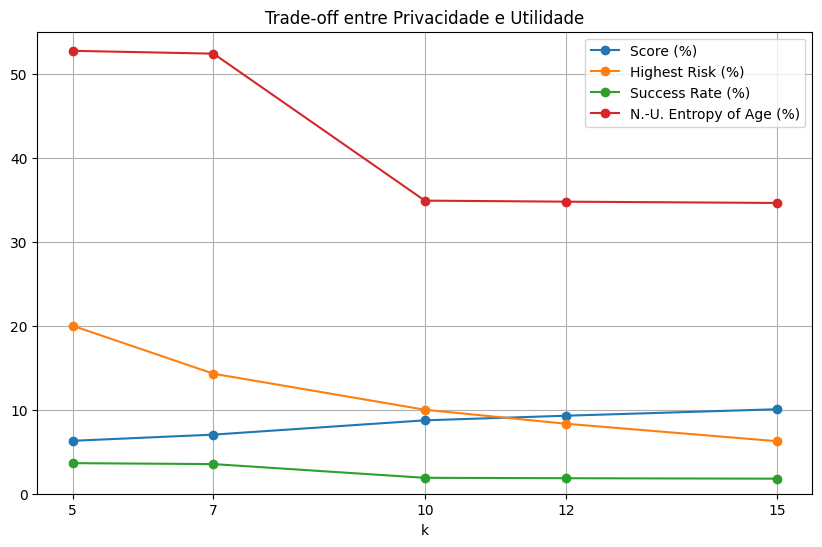

In [74]:
df = pd.read_csv("k_results.csv", delimiter=';')

x = df.iloc[:, 0]

plt.figure(figsize=(10, 6))

for coluna in df.columns[1:]:
    plt.plot(x, df[coluna], marker='o', linestyle='-', label=coluna)  # 'o' para bolinhas

plt.xticks([5, 7, 10, 12, 15])

plt.ylim(0, 55)
plt.xlabel(df.columns[0])
plt.title("Trade-off entre Privacidade e Utilidade")
plt.legend()
plt.grid(True)

plt.show()

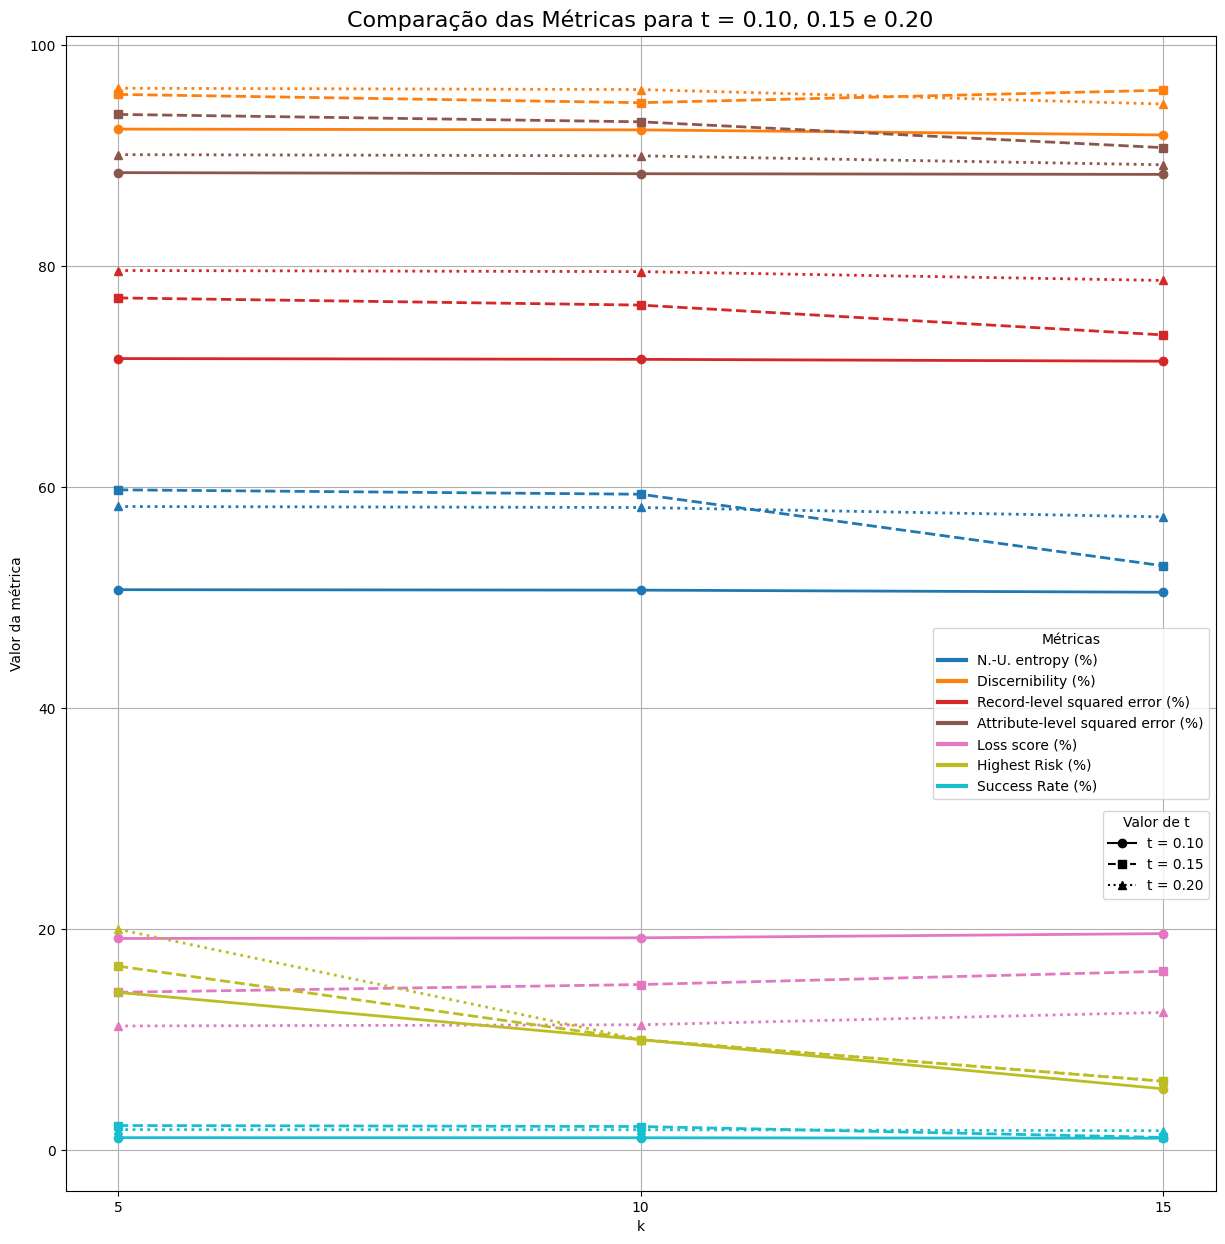

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# Carregar os dados
df_01 = pd.read_csv("results_01.csv")
df_015 = pd.read_csv("results_015.csv")
df_02 = pd.read_csv("results_02.csv")

# Selecionar métricas
metrics = df_01.columns.drop(['k', 't'])

# Gerar cores únicas para cada métrica
colors = cm.get_cmap('tab10', len(metrics))

# Estilos de linha por t
linestyles = {0.1: 'solid', 0.15: 'dashed', 0.2: 'dotted'}
markers = {0.1: 'o', 0.15: 's', 0.2: '^'}

plt.figure(figsize=(20, 15))  # espaço extra

for i, metric in enumerate(metrics):
    plt.plot(df_01['k'], df_01[metric], label=f'{metric}',
             color=colors(i), linestyle=linestyles[0.1], marker=markers[0.1],
             linewidth=2, markersize=6)

    plt.plot(df_015['k'], df_015[metric], color=colors(i),
             linestyle=linestyles[0.15], marker=markers[0.15],
             linewidth=2, markersize=6)

    plt.plot(df_02['k'], df_02[metric], color=colors(i),
             linestyle=linestyles[0.2], marker=markers[0.2],
             linewidth=2, markersize=6)

plt.xticks(df_01['k'])
plt.title('Comparação das Métricas para t = 0.10, 0.15 e 0.20', fontsize=16)
plt.xlabel('k', fontsize=10)
plt.ylabel('Valor da métrica', fontsize=10)
plt.grid(True)

# Legendas
metric_handles = [Line2D([0], [0], color=colors(i), linewidth=3, label=metric) for i, metric in enumerate(metrics)]
style_handles = [
    Line2D([0], [0], color='black', linestyle='solid', marker='o', label='t = 0.10'),
    Line2D([0], [0], color='black', linestyle='dashed', marker='s', label='t = 0.15'),
    Line2D([0], [0], color='black', linestyle='dotted', marker='^', label='t = 0.20')
]

legend1 = plt.legend(handles=metric_handles, title="Métricas", loc='upper left',
                     bbox_to_anchor=(0.555, 0.49), bbox_transform=plt.gcf().transFigure)
legend2 = plt.legend(handles=style_handles, title="Valor de t", loc='lower left',
                     bbox_to_anchor=(0.64, 0.3), bbox_transform=plt.gcf().transFigure)
plt.gca().add_artist(legend1)

# Ajustar espaço à direita (menos exagerado)
plt.subplots_adjust(right=0.7)

plt.show()


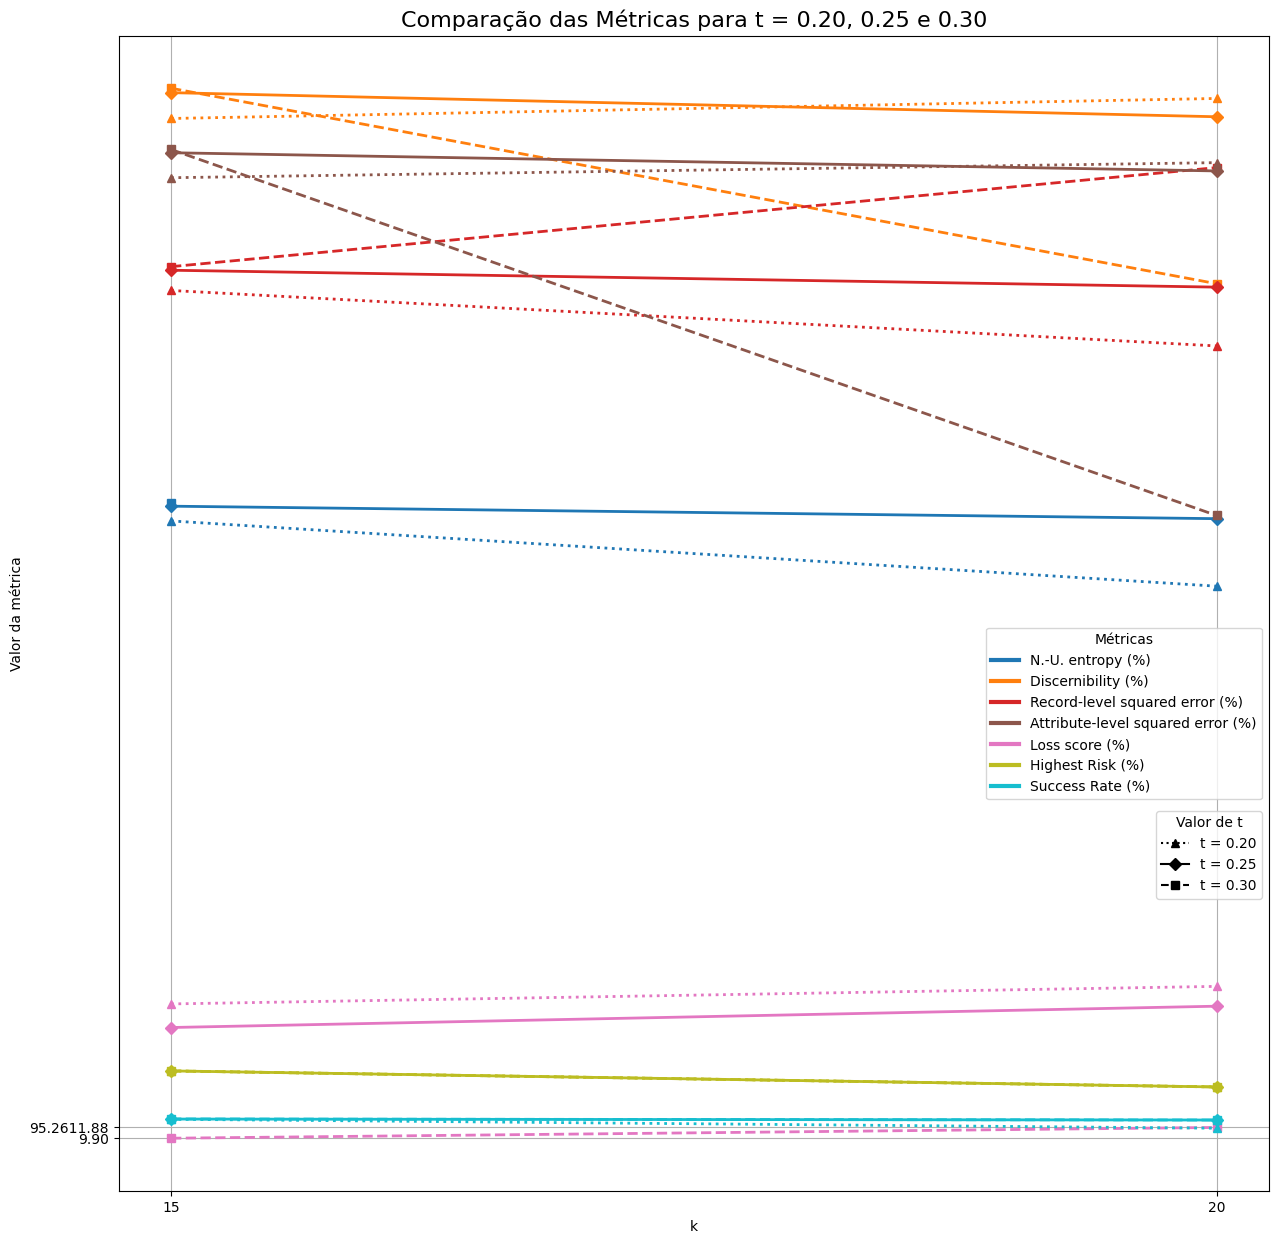

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# Carregar os dados
df_02 = pd.read_csv("novo_02.csv")
df_025 = pd.read_csv("novo_025.csv")
df_03 = pd.read_csv("novo_03.csv")

# Selecionar métricas
metrics = df_02.columns.drop(['k', 't'])

# Gerar cores únicas para cada métrica
colors = cm.get_cmap('tab10', len(metrics))

# Estilos de linha por t
linestyles = {
    0.2: 'dotted',
    0.25: 'solid',
    0.3: 'dashed'
}
markers = {
    0.2: '^',   # triângulo
    0.25: 'D',  # losango
    0.3: 's'    # quadrado
}

plt.figure(figsize=(20, 15))  # espaço extra

for i, metric in enumerate(metrics):
    plt.plot(df_02['k'], df_02[metric], label=f'{metric}',
             color=colors(i), linestyle=linestyles[0.2], marker=markers[0.2],
             linewidth=2, markersize=6)

    plt.plot(df_025['k'], df_025[metric], color=colors(i),
             linestyle=linestyles[0.25], marker=markers[0.25],
             linewidth=2, markersize=6)

    plt.plot(df_03['k'], df_03[metric], color=colors(i),
             linestyle=linestyles[0.3], marker=markers[0.3],
             linewidth=2, markersize=6)

plt.xticks(df_02['k'])
plt.title('Comparação das Métricas para t = 0.20, 0.25 e 0.30', fontsize=16)
plt.xlabel('k', fontsize=10)
plt.ylabel('Valor da métrica', fontsize=10)
plt.grid(True)

# Legendas
metric_handles = [Line2D([0], [0], color=colors(i), linewidth=3, label=metric) for i, metric in enumerate(metrics)]
style_handles = [
    Line2D([0], [0], color='black', linestyle=linestyles[0.2], marker=markers[0.2], label='t = 0.20'),
    Line2D([0], [0], color='black', linestyle=linestyles[0.25], marker=markers[0.25], label='t = 0.25'),
    Line2D([0], [0], color='black', linestyle=linestyles[0.3], marker=markers[0.3], label='t = 0.30')
]

legend1 = plt.legend(handles=metric_handles, title="Métricas", loc='upper left',
                     bbox_to_anchor=(0.555, 0.49), bbox_transform=plt.gcf().transFigure)
legend2 = plt.legend(handles=style_handles, title="Valor de t", loc='lower left',
                     bbox_to_anchor=(0.64, 0.3), bbox_transform=plt.gcf().transFigure)
plt.gca().add_artist(legend1)

# Ajustar espaço à direita
plt.subplots_adjust(right=0.7)

plt.show()


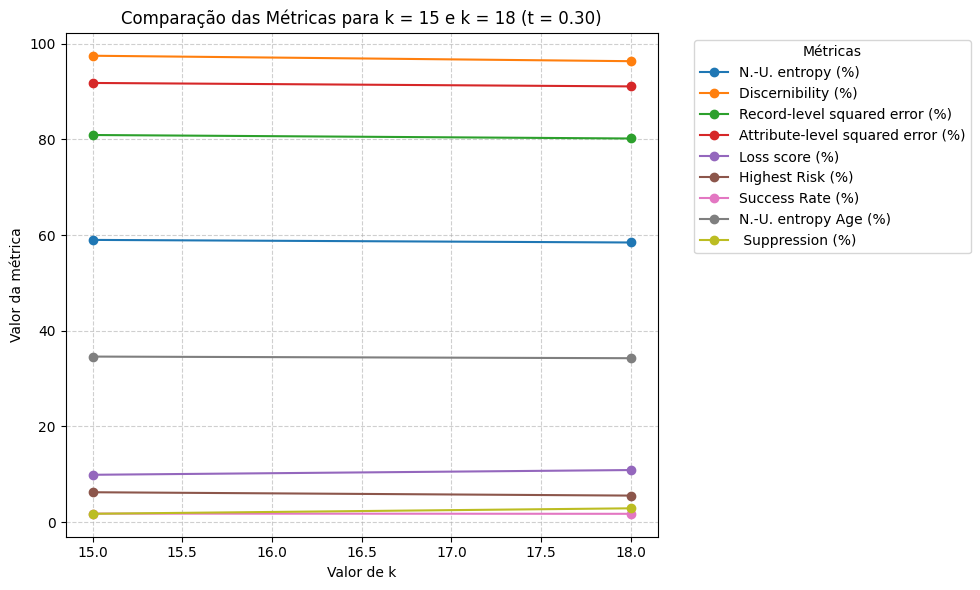

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv("valor_k.csv")

# Filtrar apenas k = 15 e 18
df = df[df['k'].isin([15, 18])]

# Métricas a incluir (tirar 'k' e 't')
metrics = df.columns.drop(['k', 't'])

# Criar gráfico
plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.plot(df['k'], df[metric], marker='o', linestyle='-', linewidth=1.5, label=metric)

plt.title("Comparação das Métricas para k = 15 e k = 18 (t = 0.30)", fontsize=12)
plt.xlabel("Valor de k", fontsize=10)
plt.ylabel("Valor da métrica", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Métricas", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [78]:
import pandas as pd

# Ler o dataset anonimizado
df = pd.read_csv("privacidade_proj1-anonymized.csv")

# Agrupar pela coluna "Age" e calcular a média do salário
stats_age = df.groupby("Age").agg({
    "EstimatedSalary": "mean"
}).reset_index()

# Renomear a coluna
stats_age.rename(columns={"EstimatedSalary": "Média dos Salários"}, inplace=True)

# Mostrar o resultado
print(stats_age)


        Age  Média dos Salários
0         *        98359.818028
1  [18, 30[       101338.053982
2  [30, 40[        98616.317653
3  [40, 50[       103526.267836
4  [50, 93[        96829.421431
